# SimEx sumovsl

Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 2.75]]


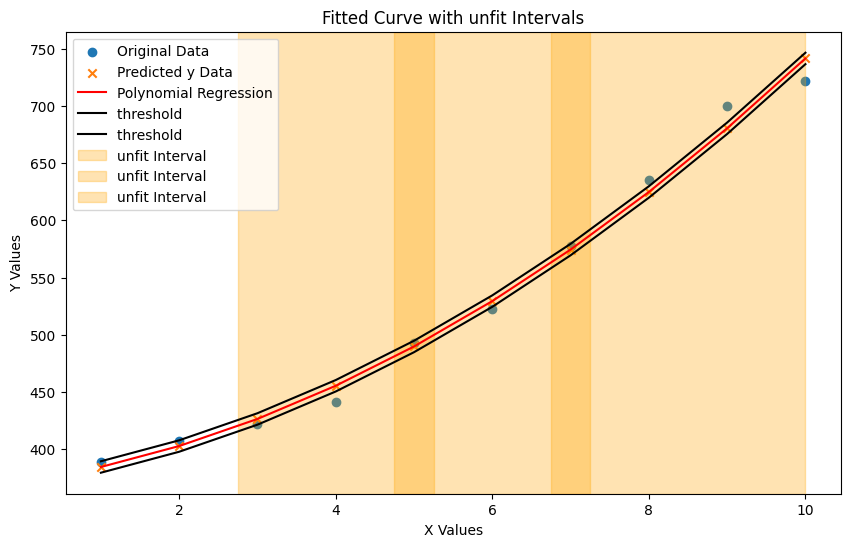

MAIN interval list from VAL: [[2.75, 5.25], [4.75, 7.25], [6.75, 10]]


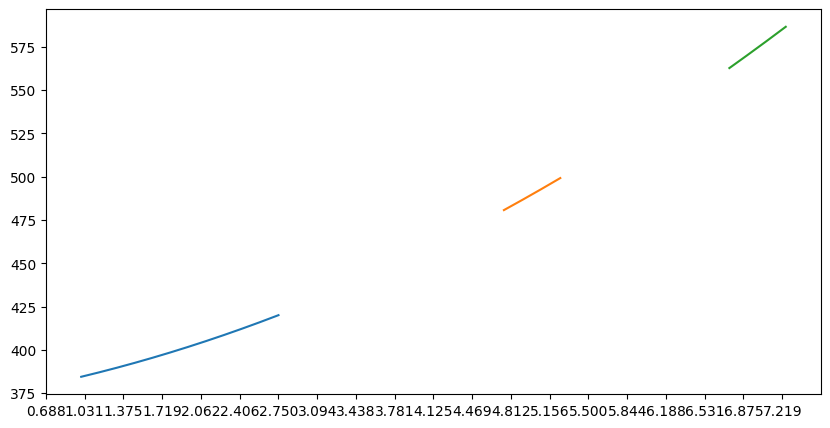

In [2]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist

# Calls Simulator
# Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
# Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator'])
assert len(mod_x) == len(sim_y_list)

print("MAIN modx", mod_x)

# Calls Validator controller
intervals_list =  validator_controller.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
print("MAIN interval list from VAL:", intervals_list)


# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

    